# DETECTION DE FRAUDES__EDA

Ce notebook présente toute la phase d'EDA dans ce projet

Le but de l'EDA (Exploratory Data Analysis) est d'explorer nos données pour mieux les comprendre et se donner une première opinion des modifications qu'il faudra faire durant la face de pre-processing

**Problématique: développer un modèle de classification binaire de machine learning pour prédire si une transaction bancaire est une fraude ou non**

## Sommaire

i)import des bibliothèques

ii)import du dataset

iii)analyse de la forme


#### A)Analyse Univariée

    1)graphiques des colonnes floats
    2)graphiques des colonnes ints
    3)graphiques des colonnes objects
    
#### B)Analyse bivariée : target/variable
    
    1)fraudes/type
    2)fraudes/step
    3)fraudes/amount
    4)fraudes/oldbalanceOrg
    5)fraudes/newbalanceOrig
    6)fraudes/oldbalanceDest
    7)fraudes/newbalanceDest
    8)fraudes/isflaggedfraud
  
#### C) Analyse bivariée : variable/variable

    1)corrélation entre variables quantitatives
    2)type/amount
    3)step/type
    4)Analyse plus poussée de la colonne step
    
#### IV) Modifications proposé et autres questionnements sur le dataset suite à l'EDA


### i) import des bibliothèques

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

### ii) import du dataset

On importe notre dataset grâce à pandas, tout au long du notebook,
le dataset de base ( sans modifications) sera appelé **fraudes**

In [4]:
os.chdir('C:\\Users\\matth\\jupyter codes')
fraudes=pd.read_csv('fraudes_bancaires.csv')
fraudes.head(25)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [6]:
fraudes

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### iii) Analyse de la forme

Dans cette partie, nous allons nous faire une rapide idée des dimensions du dataset, de ses colonnes

In [7]:
fraudes.shape

(6362620, 11)

In [8]:
fraudes.dtypes.value_counts() 

float64    5
int64      3
object     3
dtype: int64

Le dataset contient 6362620 lignes et 11 colonnes, C'est donc un  dataset assez conséquent.
On y trouve 5 colonnes de type float, 3 objects et 3 int. Les types n'étant pas homogènes il est probable que nous ayons à appliquer des transformations différentes selon les colonnes lors du preprocessing.


## I) Analyse Univariée

Dans cette partie, nous allons nous intéresser plus en détail à chaque colonnes.

On va compter le nombre de fois où les transactions ont été frauduleuse

In [9]:
fraudes['isFraud'].value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

99,87 % des transactions ne sont pas des fraudes et 0,13% le sont. On est donc face à un dataset très désequilibré, il sera nécessaire d'appliquer des algorithmes pour le réequilibrer ( avec le package imblearn, application de SMOTE...)

### 1) graphiques des colonnes floats

Regardons chacune des colonnes de type float que l'on trouve dans notre dataset

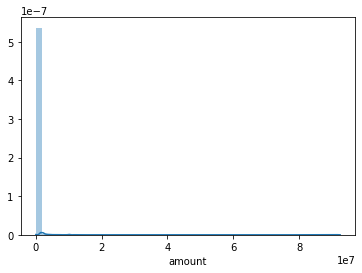

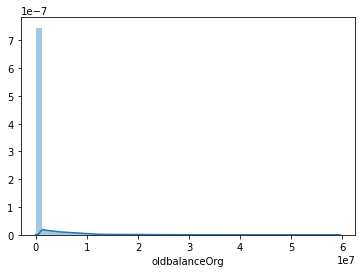

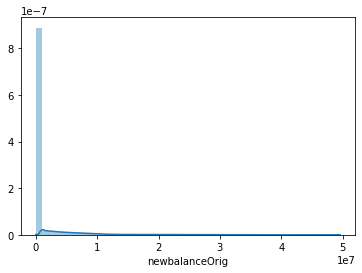

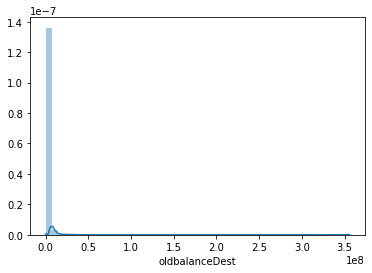

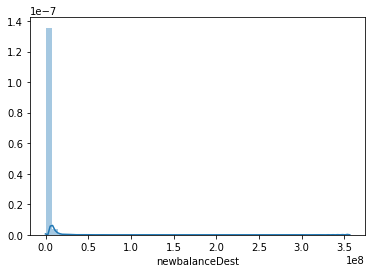

In [10]:
for col in fraudes.select_dtypes('float'):
    plt.figure()
    sns.distplot(fraudes[col]) 

La signification précise de l'axe des ordonnées n'est pas pas très clair (displot n'est sans doutes pas la meilleur fonction pour l'utilisation que j'en fait) mais on devine bien qu'il s'agit à chaque fois d'une mesure de la répartition de ces valeurs. Pour chacuns de ces graphes on voit que la grande majorité des valeurs sont inférieur à un million, alors que les plus grandes atteignent plusieurs dizaines voir centaines de millions

In [11]:
fraudes.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


 Les variables float sont:
 
 - amount__________	montant de la transaction, s'étend de 0 jusqu'à 90 millions pour les valeurs extremes
 
 - oldbalanceOrg___compte de l'envoyeur avant transaction, de 0 à 60 millions
 
 - newbalanceOrig__compte de l'envoyeur après transaction, de 0 à 50 millions
 
 - oldbalanceDest__compte du destinataire avant transaction, de 0 à 350 millions
 
 - newbalanceDest__	compte du destinataire après transaction; de 0 à 350 millions

Les données du graphique ne se regroupent à chaques fois que sur une frange proche de l'axe des ordonnées. Cela montre que l'on retrouve un certain nombre d'outlier dans nos données ( typiquement les transactions qui dépassent 50 millions sont très rares mais leur montant est largement supérieur à la mediane). IL faudra surtout prendre cela en compte lorsque nous allons standardiser nos données durant le preprocessing

### 2) graphiques des colonnes int

**colonne step**

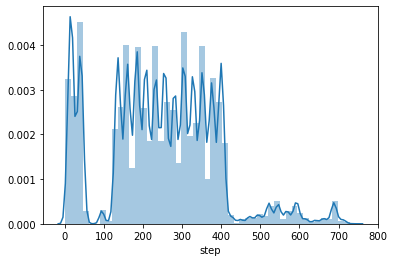

In [12]:
plt.figure()
sns.distplot(fraudes['step'])

'step' va de 1 à 743. Chaque step represente 1h, le dataset represente ainsi l'ensemble des transactions sur un mois.
On retrouve une proportion plus importante de transactions surtout lors des 80 premiers steps environ, puis de 110 à 400.

On remarque aussi des oscillations assez fréquentes dans la proportion de transaction par step,( bien visible entre 110 et 400), ce qui met peut être en évidence que les transactions s'effectuent surtout à certaines heures de la journée. Il semble donc pertinent de créer une variable heure pour confirmer cette hypothèse.

Toutefois le graphique dans son état actuel nous empêche de voir en détail chaque step (les barres sonr trop larges), nous allons mettre le parametre 'bins' à 743 pour pouvoir observer chaques step individuellement

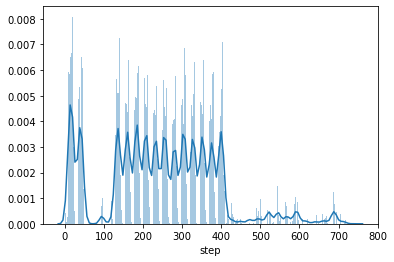

In [13]:
plt.figure()
sns.distplot(fraudes['step'],bins=743)

En "découpant" encore plus l'histogramme on se rend compte que les transactions sont très regroupés sur certains steps. En se renseignant un peu sur le dataset, on peut apprendre qu'il renseigne en réalité un mois complet de journaux financiers d'un service d'argent mobile. La forme de l'histogramme semble assez cohérente avec la volatilité que l'on attribue aux marchées financiers.

**Histogramme de 'isFlaggedFraud'**

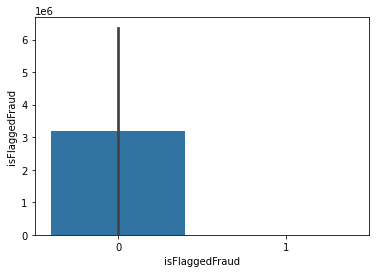

In [14]:
plt.figure()
sns.barplot(x=fraudes['isFlaggedFraud'], y=fraudes['isFlaggedFraud'].value_counts())

la barre des '1' n'est même pas visible

In [15]:
fraudes['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

On constate qu'on ne retrouve que 16 valeurs '1' dans la colonne 'isFlaggedFraud' (sur plus de 6 milions de lignes). Cette variable est t-elle vraiment utilisable pour notre modèle?

### 3) graphique des colonnes objects

#### les différents types de transactions


Regardons plus en détail les différents types de transactions dans ce dataset:

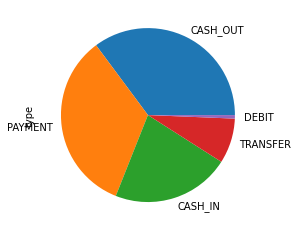

In [16]:
fraudes['type'].value_counts().plot.pie()

Il ya 5 types d'opérations dans ce dataset. On retrouve une majorité de payment et de cash-out, mais très peu d'opérations de débit

#### noms des envoyeurs et receveurs


L'identifiant de l'envoyeur et du destinataire ne semble pas être des variables intéressantes à premiere vue, à part si on trouve plusieurs transactions effectuée par les mêmes individues dans ce dataset. Auxquelle cas on pourrait chercher une correlation entre le nombre de transaction effectué par un seul individue et sa propention à frauder

In [17]:
fraudes.shape

(6362620, 11)

In [18]:
fraudes['nameOrig'].nunique()

6353307

In [19]:
fraudes['nameOrig'].value_counts()

C363736674     3
C2051359467    3
C1784010646    3
C545315117     3
C1677795071    3
              ..
C1594075386    1
C817782387     1
C1581264068    1
C712432507     1
C301226446     1
Name: nameOrig, Length: 6353307, dtype: int64

Il y a à peine 10 000 valeurs non-uniques, autrement dit, on retrouve quasi-systématiquement une seul transaction par envoyeur. L'envoyeur ayant effectué le plus de transaction n'en a effectué que 3. La variable 'nameOrig' est donc sans doute inutile pour notre modèle

In [20]:
fraudes['nameDest'].nunique()

2722362

In [21]:
fraudes['nameDest'].value_counts()
#la colonne semble significative

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C1590550415    101
              ... 
M1402686124      1
M67885592        1
M244486344       1
M1929408133      1
C148758587       1
Name: nameDest, Length: 2722362, dtype: int64

 L'utilisation de la variable 'nameDest' pour notre modèle semble à priori plus pertinente. presque 4 millions de noms de destinataires se repetent dans le dataset, et certains destinataires ont recu plus de 100 transactions. Mais il y toujours beaucoup trop de valeurs uniques. Dans cette analyse, nous allons considéré que 'NameDest' est trop difficile à exploiter pour qu'elle valle la peine d'être garder

## II) relations variables/ target

Dans cette partie nous allons mettre en relations chaques colonnes avec la target 'isFraud', pour déceler des corrélations

#### creations des datasets avec que des fraudes ou que des non-fraudes

In [22]:
fraudes_true=fraudes[fraudes['isFraud']==1]
fraudes_false=fraudes[fraudes['isFraud']==0]

### 1) fraudes/type

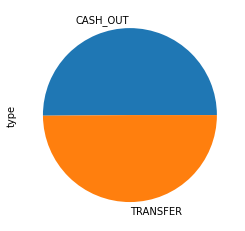

In [23]:
fraudes_true['type'].value_counts().plot.pie()

On ne retrouve que des transfert et des cash_out lorsque l'on isole les transactions frauduleuses. Il y a aussi proportionnelement plus de transfert frauduleux que de cash_out frauduleux. Se pose donc la question de l'intêret des autres types de transactions pour notre variable.

In [24]:
fraudes_true.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.00,0.00,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.00,0.00,1,0


Il est intéréssant de constater que les fraudes forment souvent des pairs dans le tableau:
d'abord un transfert d'un certain montant, puis un cash-out du même montant. Pourtant l'envoyeur et le destinataire 
sont différents

### 2) fraudes/step

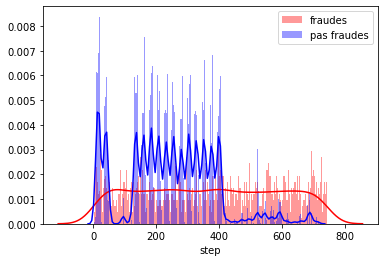

In [25]:
plt.figure()
sns.distplot(fraudes_true['step'],label='fraudes',color='red',bins=743)
sns.distplot(fraudes_false['step'],label='pas fraudes',color='blue',bins=743)
plt.legend()


les fraudes sont réparties globalement uniformément tout au long du mois (en valeur absolue du moins; nous tracerons plus tard un graphe qui represente le taux de fraude en fonction de step)

### 3) fraudes/amount

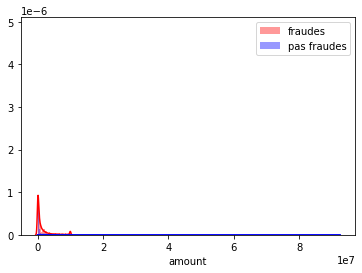

In [26]:
plt.figure()
sns.distplot(fraudes_true['amount'],label='fraudes',color='red',bins=744)
sns.distplot(fraudes_false['amount'],label='pas fraudes',color='blue',bins=744)
plt.legend()

Ce genre de graphe est difficile à lire à cause des valeurs extremes

 **les variables quantitatives sont dures à observer sur un graphiques (très assymétriques)
 on essaye donc de tirer des informations en créant de nouveaux datasets plus réduit en mettant un seuil minimal 
pour les variables quantitatives: On pourra ensuite voir le pourcentage de fraudes en fonction du seuil imposé**

### 3) fraudes/amount (révisé)

Text(0, 0.5, 'pourcentage de fraude')

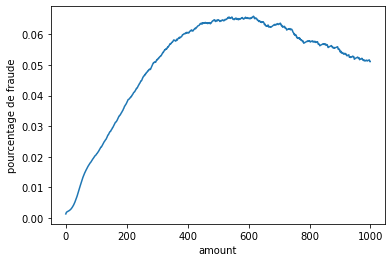

In [43]:
proportion_de_fraude=np.array([])

for i in range(0,10000000,10000):
    data=fraudes[fraudes['amount']>i]
    proportion_de_fraude=np.append(proportion_de_fraude,data['isFraud'].value_counts(normalize=True)[1])

plt.figure()
plt.plot(proportion_de_fraude)
plt.xlabel('amount')
plt.ylabel('pourcentage de fraude')

**( pour toutes les courbes qui suivent il faut multiplier l'axe des abcisses par 10000 pour obtenir le seuil minimal imposé)**

**Ces graphiques représentent les taux de fraudes pour  les transactions dont la variable representé par chaque graphes est au dessus du seuil imposé. Les seuils minimaux vont de 0 à 10 millions ( pas de 10 000). Les valeurs au dela de 10 millions sont trop peu nombreuses pour que l'on puisse retrouver un nombre satisfaisant de données pour calculer un taux de fraude representatif ( on ne fait donc pas augmenter plus le seuil)**

Pour la courbe fraude/amount, on constate que le taux de fraude augmente linéairement en fonction du montant jusqu'à environ 5 millions, puis se met à baisser.

### 4) fraudes/oldbalanceOrg

Text(0, 0.5, 'pourcentage de fraude')

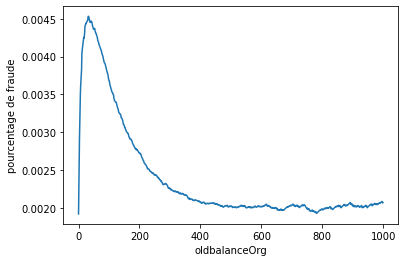

In [42]:
proportion_de_fraude2=np.array([])

for i in range(0,10000000,10000):
    data=fraudes[fraudes['oldbalanceOrg']>i]
    proportion_de_fraude2=np.append(proportion_de_fraude2,data['isFraud'].value_counts(normalize=True)[1])

plt.figure()
plt.plot(proportion_de_fraude2)
plt.xlabel('oldbalanceOrg')
plt.ylabel('pourcentage de fraude')

On constate que les petits comptes sont davantages origines des fraudes que les gros comptes

### 5) fraudes/newbalanceOrig

Text(0, 0.5, 'pourcentage de fraude')

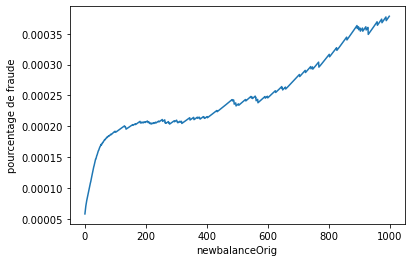

In [41]:
proportion_de_fraude3=np.array([])

for i in range(0,10000000,10000):
    data=fraudes[fraudes['newbalanceOrig']>i]
    proportion_de_fraude3=np.append(proportion_de_fraude3,data['isFraud'].value_counts(normalize=True)[1])

plt.figure()
plt.plot(proportion_de_fraude3)
plt.xlabel('newbalanceOrig')
plt.ylabel('pourcentage de fraude')

Plus l'envoyeur possède d'argent apres la transaction, plus il y a de chances qu'il s'agisse d'une fraudes

### 6) fraudes/oldbalanceDest

Text(0, 0.5, 'pourcentage de fraude')

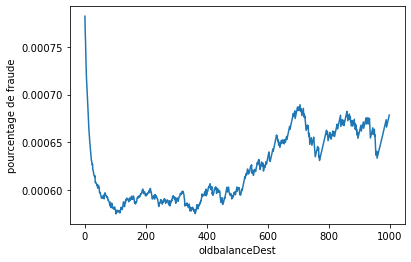

In [40]:
proportion_de_fraude4=np.array([])

for i in range(0,10000000,10000):
    data=fraudes[fraudes['oldbalanceDest']>i]
    proportion_de_fraude4=np.append(proportion_de_fraude4,data['isFraud'].value_counts(normalize=True)[1])

plt.figure()
plt.plot(proportion_de_fraude4)
plt.xlabel('oldbalanceDest')
plt.ylabel('pourcentage de fraude')

Les très petits destinataires sont davantages l'objets de fraudes que les autres. Une certaine tendance se dessine tout de même pour les autres destinataires, qui montre que plus ils possèdent d'argent plus il y a de chances qu'ils soient l'objet de fraudes

### 7) fraudes/newbalanceDest

Text(0, 0.5, 'pourcentage de fraude')

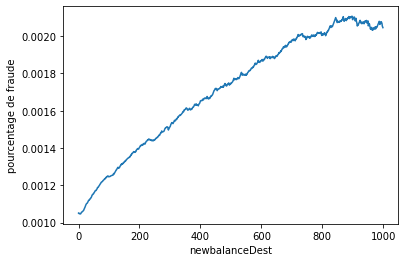

In [39]:
proportion_de_fraude5=np.array([])

for i in range(0,10000000,10000):
    data=fraudes[fraudes['newbalanceDest']>i]
    proportion_de_fraude5=np.append(proportion_de_fraude5,data['isFraud'].value_counts(normalize=True)[1])

plt.figure()
plt.plot(proportion_de_fraude5)
plt.xlabel('newbalanceDest')
plt.ylabel('pourcentage de fraude')

Plus le receveur est riche apres transaction, plus il y a de chance que cette transaction soit une fraude.

### 8) fraudes/isflaggedfraud

In [32]:
fraudes[fraudes["isFlaggedFraud"]==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


Quand une transaction est labellisé comme une fraude, il s'agit toujours d'une fraude (réel) et d'un transfert.

### Récap
- le nombre de transaction prend la forme de piques a certaines heures et peut être quasi nuls à d'autres moments
- seuls les types transferts et cash out peuvent être des fraudes
- On peut aussi constater qu'il ya proportionnelement plus de fraudes dans les transferts que dans les cash-out
- il sembletait que + le montant de la transaction augmente +le nb de fraudes augmente, puis la proportion se met à baisser autour de 5 millions
- les variables de nameOrig ne se repetent que très rarement, la colonne n'est pas utile
- il semblerait que les comptes d'origines (oldbalanceOrg) plus pauvres soient pas plus victimes de fraudes que ceux qui sont plus riches ( decroissance exponentiel)
- plus le receveur est riche apres la transaction plus il y de chances qu'il y ait fraude
- lorsque le receveur est 'pauvre' avant la transaction, il y a plus de chance qu'il s'agisse d'une fraude ( décroissance exponentielle, puis tendance à remonter mais tendance assez faible)
- la relation nombre de transaction reçu par le destinataire/pourcentage de fraude varie différemment selon le nombre de transaction (diminue jusqu'à 35, puis remonte jusqu'à 75, puis redescend...)
- isFlaggedFraud ne prend la valeur 1 que 16 fois, mais lorsqu'elle prend cette valeur alors 'isFraud' vaut toujours 1 (+ ce sont toujours des transferts)

 ## III) Analyse Bivariée: Variables/Variables

Intéressons-nous plus en détail aux relations entre d'autres variables

### 1) corrélation entre variables quantitatives

 Regardons si il est intéressant de garder toutes les variables quantitatives

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000


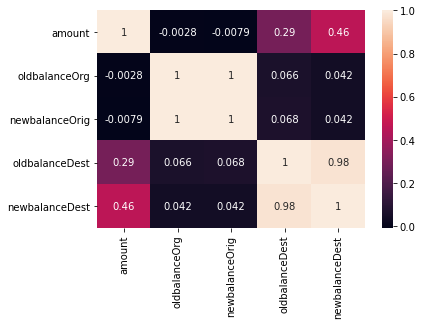

In [33]:
variables_float=fraudes.select_dtypes('float').columns
sns.heatmap(fraudes[variables_float].corr(),annot=True)
fraudes[variables_float].corr()

Tres grosse corrélation lineaire entre les 'old balance' et 'newbalance' ( pour le destinataire et l'envoyeur), il n'est sans doute pas nécessaire de garder les 4

### 2) type/amount

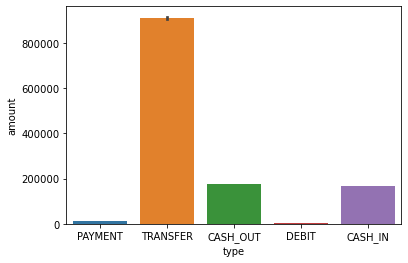

In [34]:
plt.figure()
sns.barplot(x='type', y='amount',data=fraudes)

les transactions sous forment de 'transfer' representent plus d'argent que les 'cash_out'

### 3) step/type

Nous allons créer un dataset avec uniquement des 'transfer' et un autre avec uniquement des 'cash_out'

In [35]:
fraudes_transfert=fraudes['type']=='TRANSFER'
index_transfert=fraudes_transfert[fraudes_transfert==True].index
transfert=fraudes.loc[index_transfert,:]

fraudes_cash_out=fraudes['type']=='CASH_OUT'
index_cash_out=fraudes_cash_out[fraudes_cash_out==True].index
cash_out=fraudes.loc[index_cash_out,:]

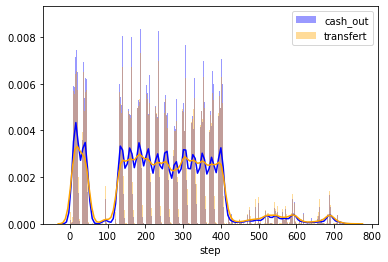

In [36]:
plt.figure()
sns.distplot(cash_out['step'],bins=743,color='blue',label='cash_out')
sns.distplot(transfert['step'],bins=743,color='orange',label='transfert')
plt.legend()

Les courbes des cash_out et transfert ressemblent beaucoup à la courbe du dataset complet, on ne peut donc pas en conclure qu'il y a plus de cash_out que de transferts à certains moment du mois 

### 4) Analyse plus poussée de la colonne step

Nous allons créer de nouvelles variables temporelles 'jours' et 'heures'

#### par heures

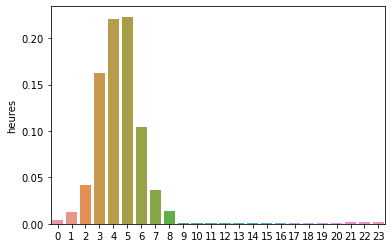

In [37]:
heures=fraudes.step %24
fraudes['heures']=heures
fraudes_true=fraudes[fraudes['isFraud']==1]
taux_fraudes_heures=fraudes_true['heures'].value_counts()/fraudes['heures'].value_counts()
sns.barplot(x=taux_fraudes_heures.index,y=taux_fraudes_heures)

On constate que le taux de fraude augmentent considérablement à certaines heures de la journée ( la nuit?), la variable 'heure' nous donne une information très importante pour la prédiction des fraudes. Nous pourrions donc remplacer 'step' par cette dernière.

#### par jours

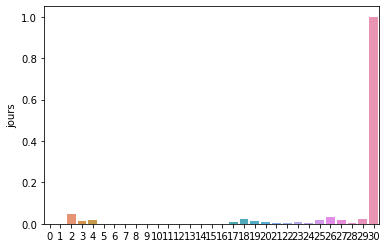

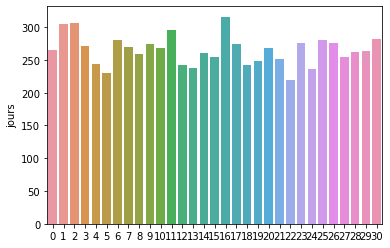

In [38]:
jours=fraudes.step //24
fraudes['jours']=jours
fraudes_true=fraudes[fraudes['isFraud']==1]
taux_fraudes_jours=fraudes_true['jours'].value_counts()/fraudes['jours'].value_counts()
plt.figure()
sns.barplot(x=taux_fraudes_jours.index,y=taux_fraudes_jours)
plt.figure()
sns.barplot(x=fraudes_true['jours'].value_counts().index,y=fraudes_true['jours'].value_counts())

Certains jours ont un taux plus élevé que d'autres (2-4, 17-20, 25-27), par contre toutes les transactions du dernier jours
sont des fraudes. On met en évidence un gros problème dans nos données, qu'il faudra sans doute traiter.
Pour cette même raison, nous ne pouvons pas rajoute une colonne jour à notre dataset

## IV) Modifications proposé et autres questionnements sur le dataset suite à l'EDA

Récapitulons les modifications que nos analyses suggèrent

- ajout d'une colonne heure-->enlever step
-  enlever les colonnes newBalanceOrig et newBalanceDest 
- enlever les lignes qui ne sont ni des transferts ni des cash_out (jamais de fraudes)
- enlever isFlaggedFraud
-  enlever nameDest et nameOrig

- besoin de réequilibrer nos données --> essayer d'appliquer un algorithme type SMOTE...
- encoder 'type'
- standardiser nos variables continues

- que faire des transactions du 30 du mois?